In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import joblib

Reading Datasets and Joining the data with the Names of Variables Standarized

In [3]:
# Importing necessary libraries


# Step 1: Define the file paths for each year's data
# Update these paths with the actual paths of your CSV files
file_paths = {
    "2015": "2015.csv",
    "2016": "2016.csv",
    "2017": "2017.csv",
    "2018": "2018.csv",
    "2019": "2019.csv"
}

column_mappings = {
    "Country or region": "Country",
    "Country": "Country",
    "Score": "Happiness Score",
    "Happiness.Score": "Happiness Score",
    "GDP per capita": "GDP per Capita",
    "Economy..GDP.per.Capita.": "GDP per Capita",
    "Economy (GDP per Capita)": "GDP per Capita",
    "Social support": "Social Support",
    "Family": "Social Support",
    "Healthy life expectancy": "Life Expectancy",
    "Health..Life.Expectancy.": "Life Expectancy",
    "Health (Life Expectancy)": "Life Expectancy",
    "Freedom to make life choices": "Freedom",
    "Freedom": "Freedom",
    "Generosity": "Generosity",
    "Perceptions of corruption": "Corruption",
    "Trust..Government.Corruption.": "Corruption",
    "Trust (Government Corruption)": "Corruption",
}


In [4]:
data_frames = []
for year, path in file_paths.items():
    # Load each CSV file
    df = pd.read_csv(path)
    # Rename columns based on the mappings
    df.rename(columns=column_mappings, inplace=True)
    # Add a 'Year' column to keep track of the data from each year
    df['Year'] = int(year)
    # Append the DataFrame to the list
    data_frames.append(df)

# Step 4: Combine all years into a single DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

# Step 5: Select only the columns of interest
selected_columns = ["Country", "Year", "Happiness Score", "GDP per Capita", 
                    "Social Support", "Life Expectancy", "Freedom", 
                    "Generosity", "Corruption"]
final_data = combined_data[selected_columns]

# Display the first few rows to confirm the structure
final_data.head()


,Country,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [5]:
final_data.to_csv('final_data.csv')

Exploratory Data Analysis

Type of data

In [6]:
final_data.dtypes

Country             object
Year                 int64
Happiness Score    float64
GDP per Capita     float64
Social Support     float64
Life Expectancy    float64
Freedom            float64
Generosity         float64
Corruption         float64
dtype: object

How many variables we have by type?

In [7]:
(
    final_data
    .dtypes
    .value_counts()
)


float64    7
object     1
int64      1
Name: count, dtype: int64

Are there explicit null values in the dataset?

In [8]:
(   final_data
    .isnull()
    .any()
)

Country            False
Year               False
Happiness Score    False
GDP per Capita     False
Social Support     False
Life Expectancy    False
Freedom            False
Generosity         False
Corruption          True
dtype: bool

In [9]:
# Summary of missing values by column
missing_values = final_data.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
Country            0
Year               0
Happiness Score    0
GDP per Capita     0
Social Support     0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         1
dtype: int64


There is one row with a null value. In the following section, we will address this by imputing the missing value.

Descriptive Stastistic

In [10]:
# Count of data entries per year
count_per_year = final_data.groupby("Year")["Happiness Score"].count()
print("Count of data entries per year:")
print(count_per_year)

# Descriptive statistics per year
descriptive_stats_per_year = final_data.groupby("Year").describe()
print("\nDescriptive statistics per year:")
print(descriptive_stats_per_year)


Count of data entries per year:
Year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: Happiness Score, dtype: int64

Descriptive statistics per year:
     Happiness Score                                                       \
               count      mean       std    min      25%     50%      75%   
Year                                                                        
2015           158.0  5.375734  1.145010  2.839  4.52600  5.2325  6.24375   
2016           157.0  5.382185  1.141674  2.905  4.40400  5.3140  6.26900   
2017           155.0  5.354019  1.131230  2.693  4.50550  5.2790  6.10150   
2018           156.0  5.375917  1.119506  2.905  4.45375  5.3780  6.16850   
2019           156.0  5.407096  1.113120  2.853  4.54450  5.3795  6.18450   

            GDP per Capita            ... Generosity           Corruption  \
        max          count      mean  ...        75%       max      count   
Year                                  ...                     

C:\Users\josed\AppData\Local\Temp\ipykernel_16132\3105038214.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Happiness Score", data=final_data, palette="pastel")


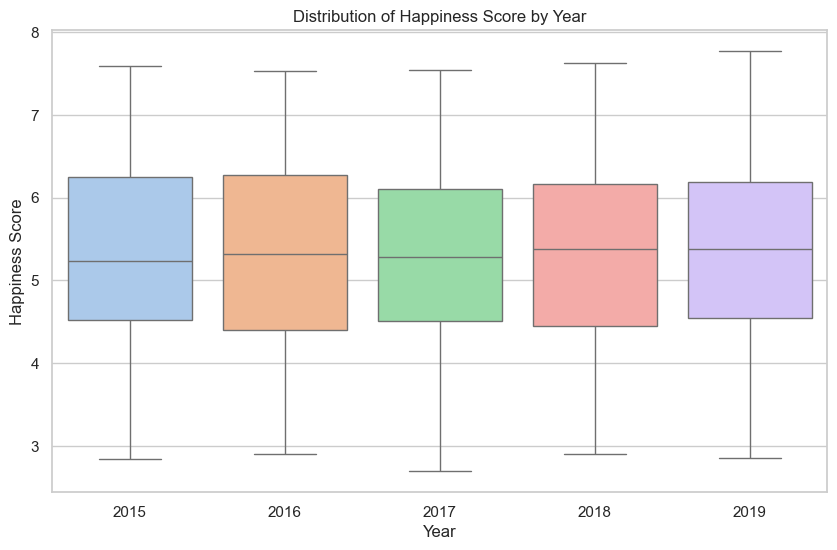

In [11]:
# Set style
sns.set(style="whitegrid")

# Boxplot of Happiness Score by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x="Year", y="Happiness Score", data=final_data, palette="pastel")
plt.title("Distribution of Happiness Score by Year")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.show()


 Consistency of Median Happiness Scores Across Years

    The median (middle line of each box) happiness score remains relatively stable from 2015 to 2019, suggesting that the overall happiness level of countries did not experience significant shifts during these years.
    Although there is some slight variation, with the median generally around 5 to 6, no single year stands out as dramatically different, indicating stable happiness scores on a global level.

 Range and Spread of Happiness Scores

    The spread (or interquartile range) is also relatively consistent across the years, indicating similar levels of variation in happiness scores each year. This suggests that the disparity between happier and less happy countries remained fairly steady from year to year.
    The minimum and maximum values are relatively stable, with the whiskers (indicating the range without outliers) extending from around 3 to 7–8. This implies that while there are differences in happiness scores among countries, these differences did not widen or narrow significantly over the observed period.

 Lack of Outliers

    There are no extreme outliers for any of the years, which could indicate that there are no countries with unusually low or high happiness scores compared to the general distribution. This suggests a fairly homogeneous distribution, with most countries clustering within a consistent range.

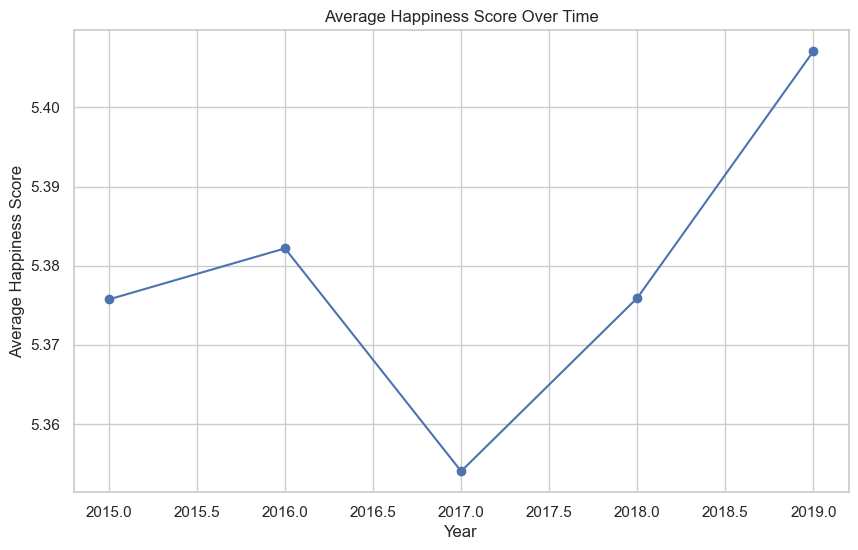

In [12]:
# Trend of average Happiness Score over time
avg_happiness_per_year = final_data.groupby("Year")["Happiness Score"].mean()

plt.figure(figsize=(10, 6))
avg_happiness_per_year.plot(marker='o')
plt.title("Average Happiness Score Over Time")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.grid(True)
plt.show()


The average happiness score shows a notable dip in 2017, reaching its lowest point across the years, followed by a steady increase through 2018 and 2019. This suggests that there may have been specific global or regional factors in 2017 that negatively impacted overall happiness levels, but these factors may have subsided or improved in subsequent years, allowing happiness scores to recover and even reach a higher average by 2019. This pattern highlights potential year-specific influences on happiness that could be explored further.

C:\Users\josed\AppData\Local\Temp\ipykernel_16132\511232040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Year", y="GDP per Capita", data=final_data, palette="muted")


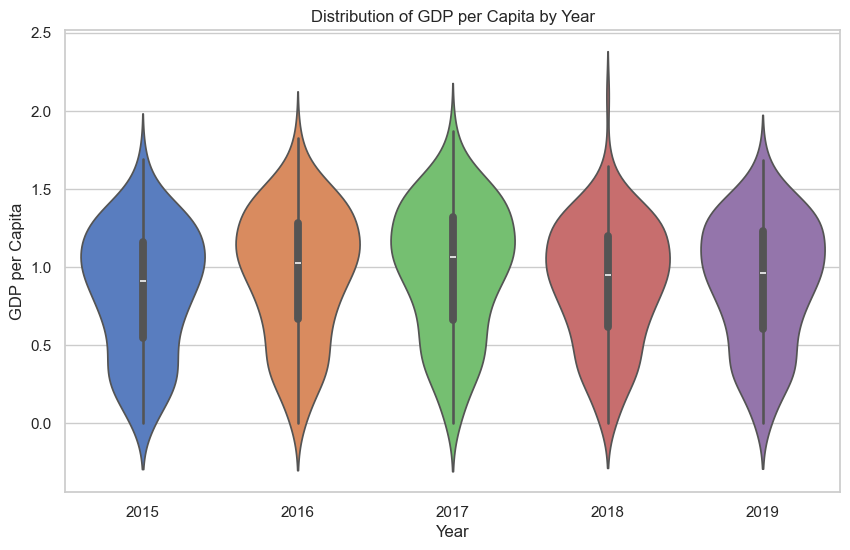

C:\Users\josed\AppData\Local\Temp\ipykernel_16132\511232040.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Year", y="Social Support", data=final_data, palette="muted")


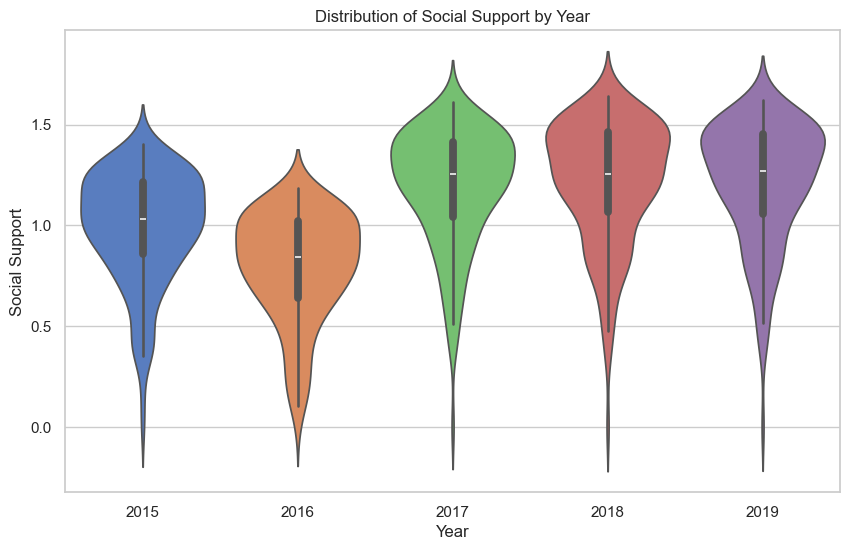

C:\Users\josed\AppData\Local\Temp\ipykernel_16132\511232040.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Year", y="Corruption", data=final_data, palette="muted")


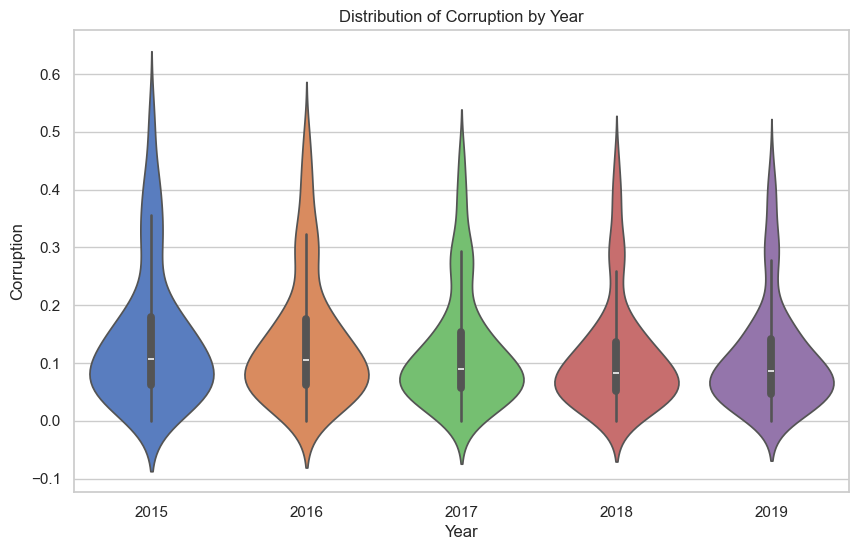

C:\Users\josed\AppData\Local\Temp\ipykernel_16132\511232040.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Year", y="Life Expectancy", data=final_data, palette="muted")


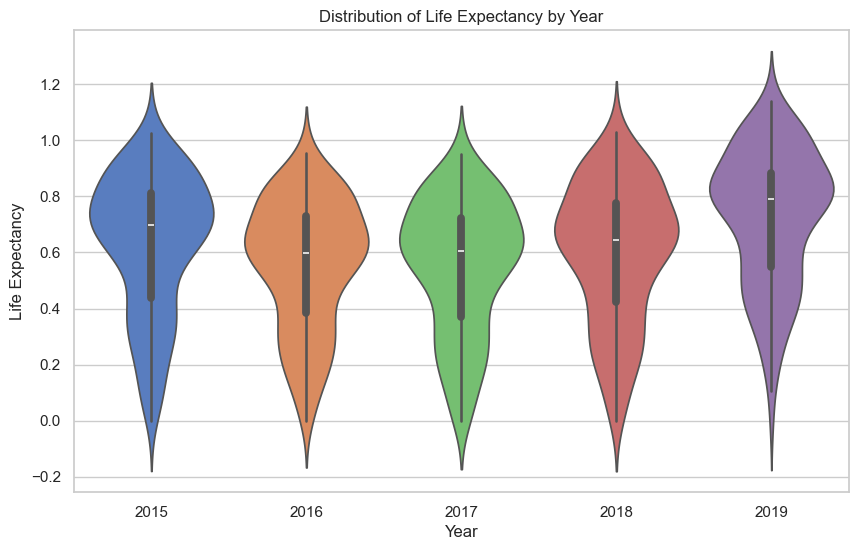

C:\Users\josed\AppData\Local\Temp\ipykernel_16132\511232040.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Year", y="Freedom", data=final_data, palette="muted")


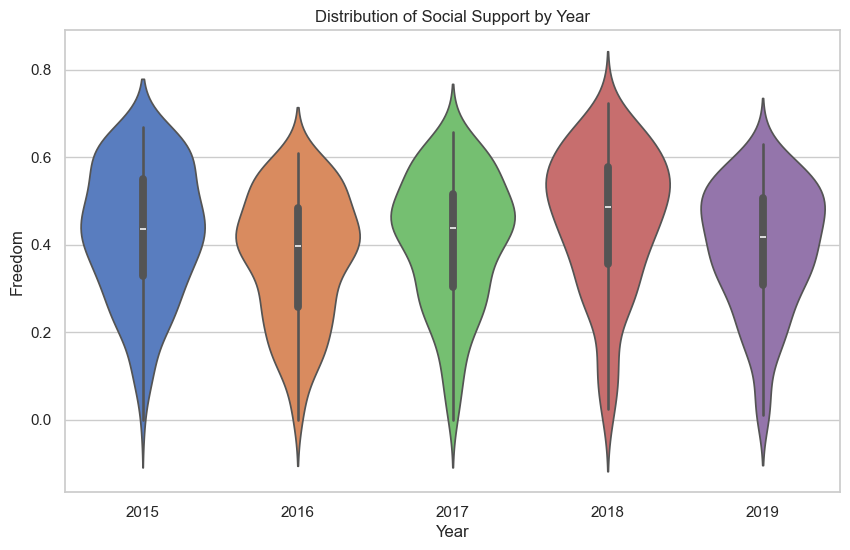

C:\Users\josed\AppData\Local\Temp\ipykernel_16132\511232040.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Year", y="Generosity", data=final_data, palette="muted")


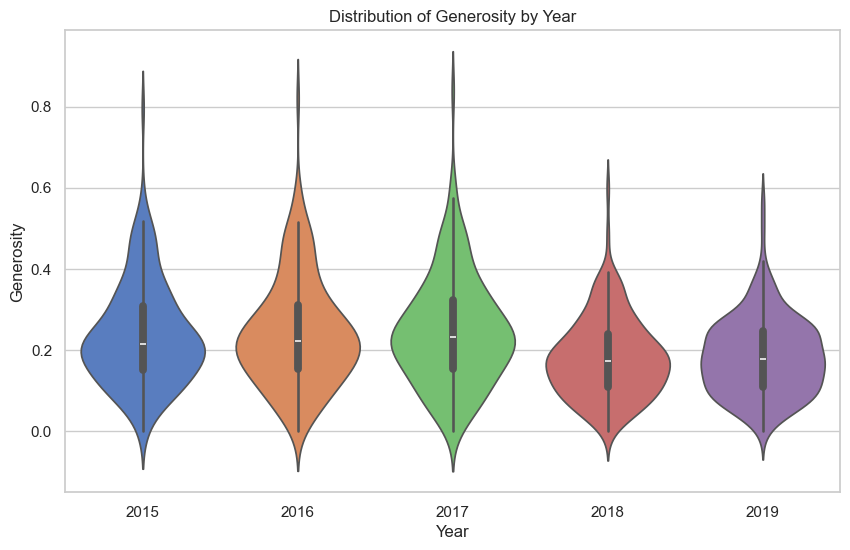

In [13]:
# Violin plot of GDP per Capita by Year
plt.figure(figsize=(10, 6))
sns.violinplot(x="Year", y="GDP per Capita", data=final_data, palette="muted")
plt.title("Distribution of GDP per Capita by Year")
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.show()

# Violin plot for Social Support by Year
plt.figure(figsize=(10, 6))
sns.violinplot(x="Year", y="Social Support", data=final_data, palette="muted")
plt.title("Distribution of Social Support by Year")
plt.xlabel("Year")
plt.ylabel("Social Support")
plt.show()

# Violin plot for Corruption
plt.figure(figsize=(10, 6))
sns.violinplot(x="Year", y="Corruption", data=final_data, palette="muted")
plt.title("Distribution of Corruption by Year")
plt.xlabel("Year")
plt.ylabel("Corruption")
plt.show()


# Violin plot for Life Expectancy
plt.figure(figsize=(10, 6))
sns.violinplot(x="Year", y="Life Expectancy", data=final_data, palette="muted")
plt.title("Distribution of Life Expectancy by Year")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()


# Violin plot for Freedom
plt.figure(figsize=(10, 6))
sns.violinplot(x="Year", y="Freedom", data=final_data, palette="muted")
plt.title("Distribution of Social Support by Year")
plt.xlabel("Year")
plt.ylabel("Freedom")
plt.show()


# Violin plot for Generosity
plt.figure(figsize=(10, 6))
sns.violinplot(x="Year", y="Generosity", data=final_data, palette="muted")
plt.title("Distribution of Generosity by Year")
plt.xlabel("Year")
plt.ylabel("Generosity")
plt.show()

GDP per Capita (2015-2019):

    The distribution of GDP per capita remains fairly consistent over the years, with a median around the 1.0 mark. The range is also quite stable, suggesting that economic development, as measured by GDP per capita, did not experience drastic changes in distribution across countries during this period.

Social Support (2015-2019):

    Social support shows a similar, stable pattern over the years, with most countries clustered around a median of approximately 1.0. This stability suggests that the level of perceived social support remained relatively steady across countries during these years.

Corruption (2015-2019):

    The distribution of perceived corruption is slightly skewed toward the lower end, with most values clustered below 0.3. This suggests that corruption levels, as perceived by citizens, remained relatively low in most countries. There’s a consistent trend toward low values over the years, indicating that perceived corruption did not vary significantly over time.

Life Expectancy (2015-2019):

    Life expectancy shows a stable distribution with a median around 0.8, suggesting that health factors remained relatively constant over the observed period. This could imply that, while there may be year-to-year variations, the overall trend in life expectancy across countries is stable.

Freedom (2015-2019):

    Freedom levels remain consistent over the years, with a median around 0.4 to 0.5. This stability indicates that the perceived freedom to make life choices is relatively unchanged, suggesting that there were no major shifts in freedom perception across the observed period.

Generosity (2015-2019):

    There is a slight decline in the distribution of generosity from 2017 onwards, with lower median values and a slightly compressed range. This trend may indicate a small reduction in perceived generosity levels across countries, potentially reflecting global or regional socio-economic factors affecting people's willingness or ability to give.

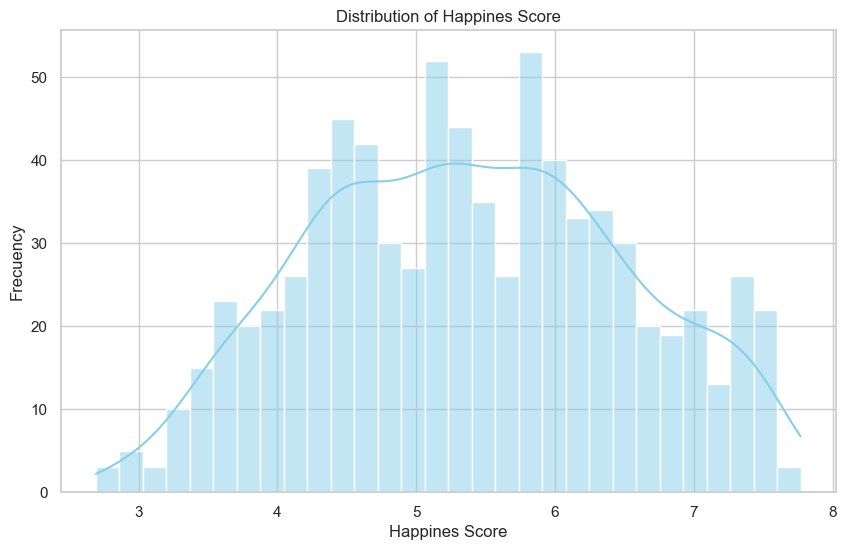

In [14]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(final_data['Happiness Score'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Happines Score")
plt.xlabel("Happines Score")
plt.ylabel("Frecuency")
plt.show()

The distribution of happiness scores across countries is approximately normal, with a peak around scores of 5 to 6, indicating that most countries tend to fall within this middle range of happiness. There is a noticeable decline in frequency as scores move toward the lower and higher extremes, suggesting that there are relatively fewer countries with very low (below 4) or very high (above 7) happiness scores. This pattern implies that extreme happiness or unhappiness is less common globally, with the majority of countries experiencing moderate levels of happiness.

Correlations between variables

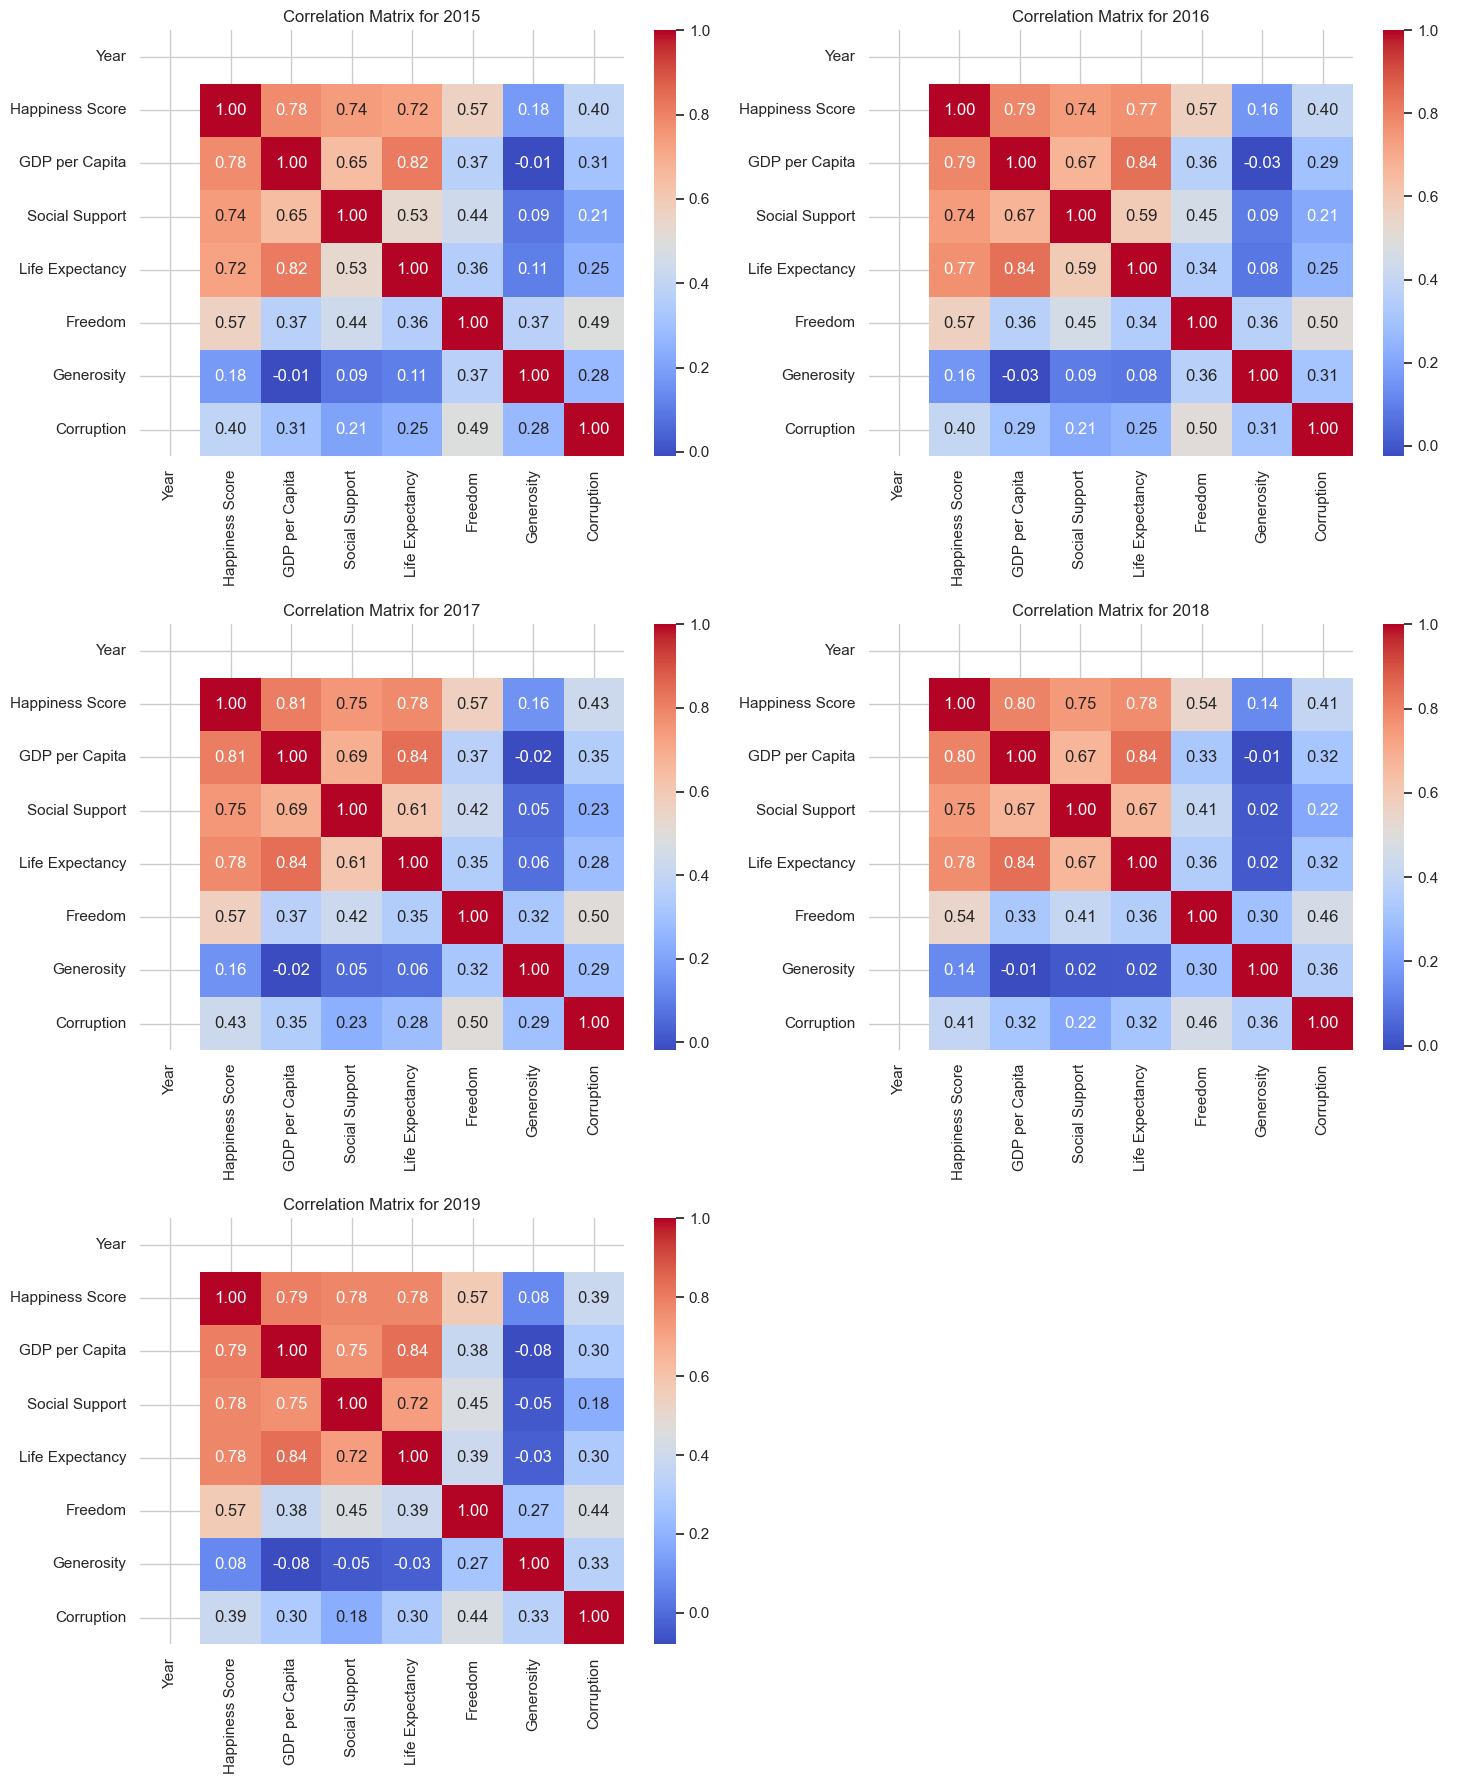

In [15]:

# Get unique years
unique_years = final_data["Year"].unique()

# Set up a grid of subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))  # Adjusted for 3x2 layout

# Flatten the axes array to easily iterate over it (since we may have fewer years than subplots)
axes = axes.flatten()

# Loop through each year and plot its correlation matrix in a subplot
for i, year in enumerate(unique_years):
    # Filter data for the specific year and select only numeric columns
    data_year = final_data[final_data["Year"] == year].select_dtypes(include=['float64', 'int64'])
    correlation_matrix = data_year.corr()

    # Plot the correlation matrix on the respective subplot
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[i])
    axes[i].set_title(f"Correlation Matrix for {year}")

# Hide any unused subplots (in case there are fewer years than subplots)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The correlation matrices for each year (2015–2019) show consistent patterns in the relationships between Happiness Score and various socio-economic factors. Notably:

    Strong Correlations with GDP per Capita and Social Support:
        Across all years, GDP per Capita and Social Support exhibit strong positive correlations with Happiness Score, often exceeding 0.7. This indicates that wealthier countries with higher levels of social support tend to have higher happiness scores, underscoring the importance of economic stability and social networks in perceived well-being.

    Moderate Correlations with Life Expectancy and Freedom:
        Life Expectancy and Freedom generally show moderate positive correlations with Happiness Score across the years, suggesting that while they contribute to happiness, their impact is less direct than economic and social factors.

    Low or Inconsistent Correlations with Generosity and Corruption:
        Generosity and Corruption show weaker and more variable correlations with Happiness Score. This inconsistency implies that while they might influence happiness, their effects may depend on other cultural or regional factors, and they are not as universally predictive of happiness as other factors.

These matrices highlight that some factors, like GDP per capita and social support, are consistently influential, whereas others like generosity and corruption have a more nuanced or context-dependent impact on happiness. This consistency across years suggests a stable model for predicting happiness based on economic and social indicators

Pair plot for selected features

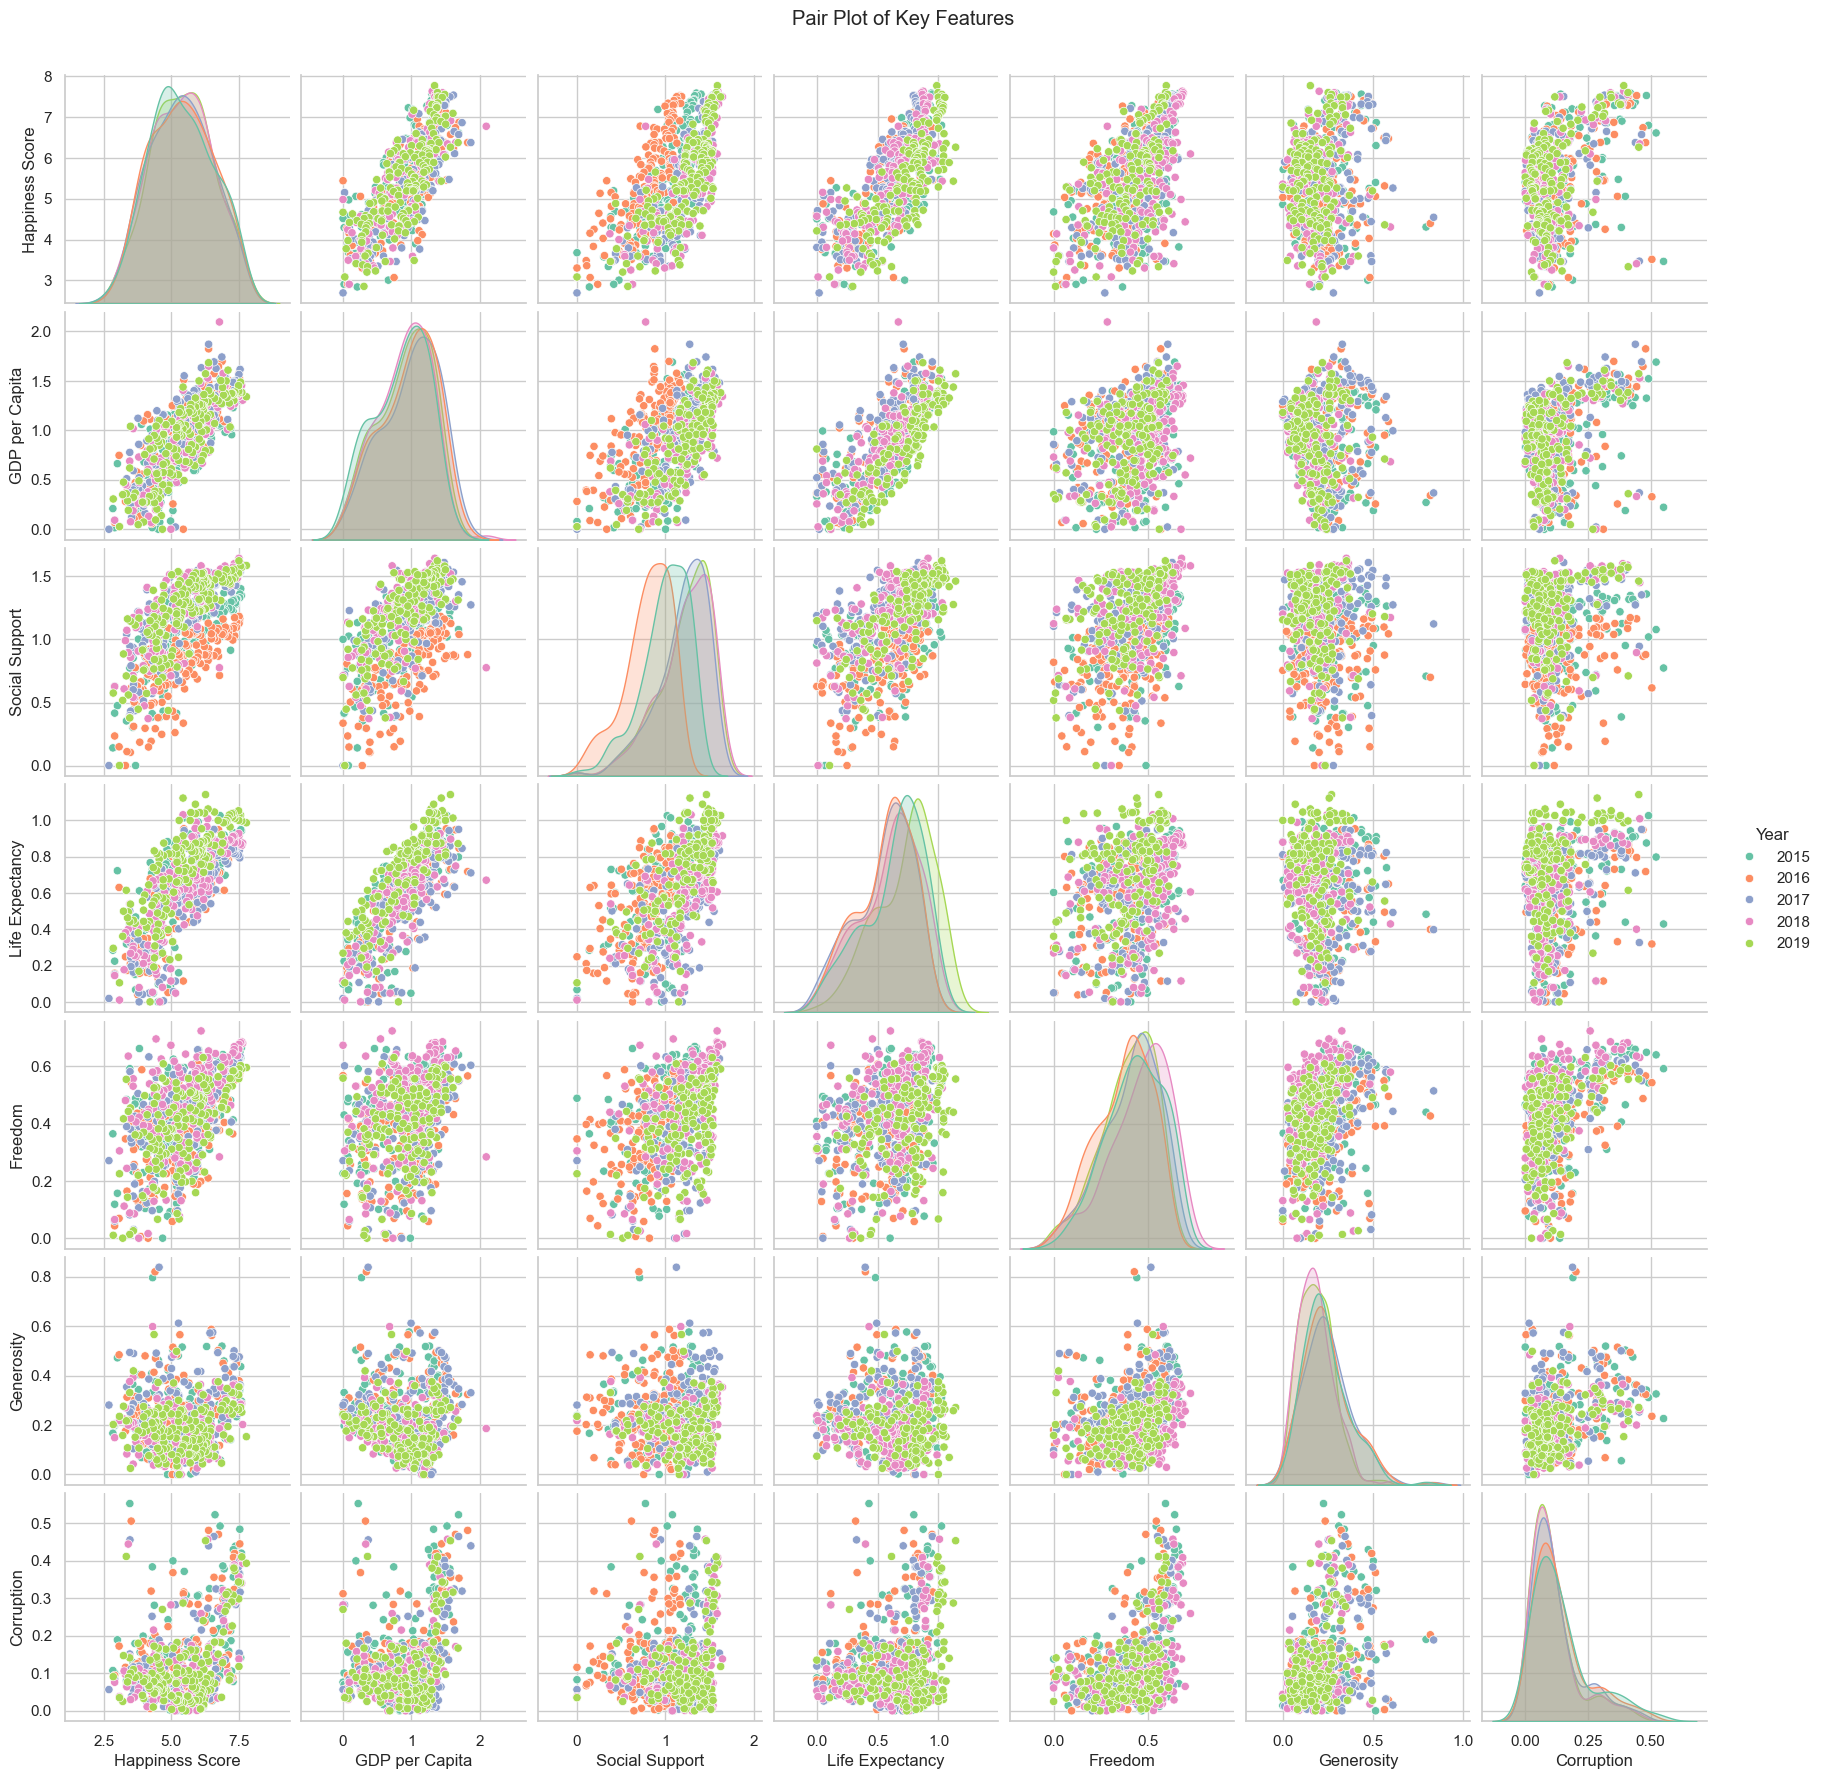

In [16]:
# Pair plot for selected features
sns.pairplot(final_data, vars=["Happiness Score", "GDP per Capita", "Social Support", 
                                "Life Expectancy", "Freedom", "Generosity", "Corruption"], 
             hue="Year", palette="Set2")
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()


Data Cleaning and Feature Selection 

In [17]:
# Summary of missing values by column
missing_values = final_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Country            0
Year               0
Happiness Score    0
GDP per Capita     0
Social Support     0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         1
dtype: int64


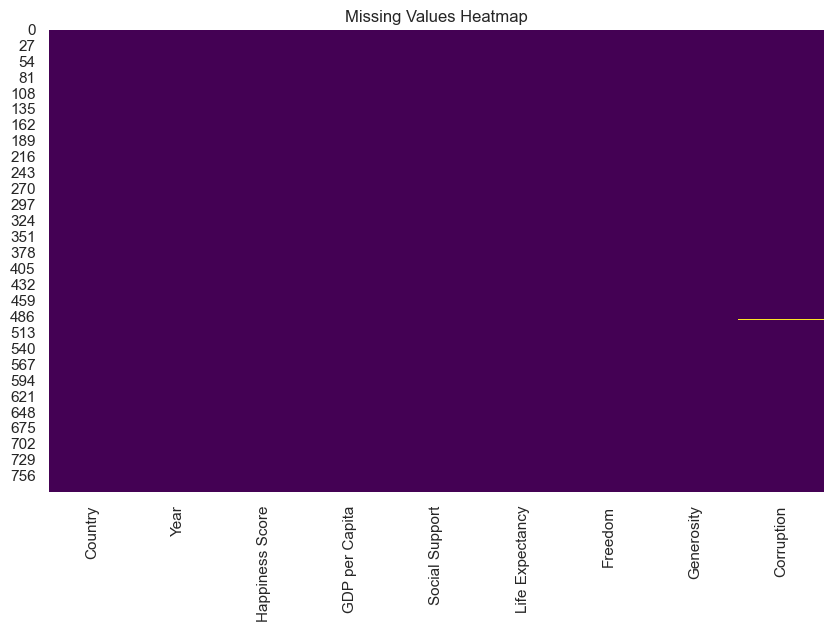

In [18]:
# Plot heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(final_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [19]:
# Calculate percentage of missing values by column
missing_percentage = final_data.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Filter only columns with missing values

print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
Corruption    0.127877
dtype: float64


Imputing missing values

In [20]:
# Step 2: Convert columns to numeric explicitly and set non-convertible values to NaN
X = final_data[["GDP per Capita", "Social Support", "Life Expectancy", 
                "Freedom", "Generosity", "Corruption"]].apply(pd.to_numeric, errors='coerce')
# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

Resolving Multicollinearity

In [21]:
# Define the target variable
y = final_data["Happiness Score"]

# Correlation with Target
# Calculate the correlation of each feature with the Happiness Score
correlations = X.corrwith(final_data["Happiness Score"])
print("\nCorrelation of each feature with Happiness Score:")
print(correlations)

# Multicollinearity Check
correlation_matrix = X.corr()
high_corr_pairs = [(correlation_matrix.columns[i], correlation_matrix.columns[j])
                   for i in range(len(correlation_matrix.columns)) 
                   for j in range(i) if abs(correlation_matrix.iloc[i, j]) > 0.8]

print("\nHighly correlated feature pairs (correlation > 0.8):")
print(high_corr_pairs)



Correlation of each feature with Happiness Score:
GDP per Capita     0.789284
Social Support     0.648799
Life Expectancy    0.742456
Freedom            0.551258
Generosity         0.137578
Corruption         0.398418
dtype: float64

Highly correlated feature pairs (correlation > 0.8):
[]


Feature selection

In [22]:

# Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_imputed, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("\nSelected features based on RFE:")
print(selected_features)



Selected features based on RFE:
Index(['GDP per Capita', 'Life Expectancy', 'Freedom'], dtype='object')


After applying these criteria, it can justify the feature selection based on:

    Direct Relevance: Features with strong correlations with Happiness Score (indicating a direct impact on the target).
    Reduced Redundancy: Features with low multicollinearity, avoiding duplicated information.
    Model Performance Impact: Features chosen by RFE that contribute to the model’s accuracy, enhancing its predictive power.

Split the Data for Training and Testing

In [23]:
# Using the selected features from RFE
X = final_data[selected_features]
y = final_data["Happiness Score"]

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Prediction Models

In [24]:

# Split the data into training and testing sets (70-30 split)
X = final_data[selected_features]  # Assuming `selected_features` contains the chosen features
y = final_data["Happiness Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Model 1 - Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Save the trained Linear Regression model
# joblib.dump(model1, "happiness_model_linear.pkl")

# Evaluate Model 1 - Linear Regression
y_pred_model1 = model1.predict(X_test)
mae1 = mean_absolute_error(y_test, y_pred_model1)
mse1 = mean_squared_error(y_test, y_pred_model1)
rmse1 = mean_squared_error(y_test, y_pred_model1, squared=False)
r2_1 = r2_score(y_test, y_pred_model1)

print("Linear Regression Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae1}")
print(f"Mean Squared Error (MSE): {mse1}")
print(f"Root Mean Squared Error (RMSE): {rmse1}")
print(f"R-squared (R2): {r2_1}")

# Train Model 2 - Decision Tree Regressor
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, y_train)

# Save the trained Decision Tree model
# joblib.dump(model2, "happiness_model_tree.pkl")

# Evaluate Model 2 - Decision Tree Regressor
y_pred_model2 = model2.predict(X_test)
mae2 = mean_absolute_error(y_test, y_pred_model2)
mse2 = mean_squared_error(y_test, y_pred_model2)
rmse2 = mean_squared_error(y_test, y_pred_model2, squared=False)
r2_2 = r2_score(y_test, y_pred_model2)

print("\nDecision Tree Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae2}")
print(f"Mean Squared Error (MSE): {mse2}")
print(f"Root Mean Squared Error (RMSE): {rmse2}")
print(f"R-squared (R2): {r2_2}")

#Save models
with open('happiness_model_linear.pkl', 'wb') as f:
    pickle.dump(model1, f)
with open('happiness_model_tree.pkl', 'wb') as f:
    pickle.dump(model2, f)

Linear Regression Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.4816526621490102
Mean Squared Error (MSE): 0.3740252201827748
Root Mean Squared Error (RMSE): 0.6115760134135206
R-squared (R2): 0.7004336518602112

Decision Tree Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.5580936168548909
Mean Squared Error (MSE): 0.5435582718815021
Root Mean Squared Error (RMSE): 0.7372640448858889
R-squared (R2): 0.5646503023802912


C:\Users\josed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\josed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
data_test = pd.concat([X_test, y_test], axis=1)
data_test.to_csv('data_test.csv', index=False)

In [26]:
data_test

,GDP per Capita,Life Expectancy,Freedom,Happiness Score
596,0.308000,0.391000,0.452000,4.350
588,0.874000,0.365000,0.519000,4.441
208,0.973060,0.686130,0.402700,5.976
291,1.158510,0.349400,0.280980,4.121
174,1.087540,0.614150,0.404250,6.952
...,...,...,...,...
393,1.081166,0.741416,0.472788,5.273
227,0.893730,0.582950,0.462350,5.538
212,0.691770,0.523090,0.252020,5.897
581,0.916000,0.790000,0.419000,4.586
